In [1]:
#Libraries for the 
import os
import numpy as np
import tweepy as tw
import pandas as pd
from matplotlib import pyplot as plt #(matplotblib)
import seaborn as sns #(visualsize)
from textblob import TextBlob
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
import time    # this is an inbuilt library in Python
#importing libraries for preprocessing
import re
import ast
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('sentiwordnet')
from nltk.stem import WordNetLemmatizer 
nltk.download('wordnet')

[nltk_data] Downloading package punkt to C:\Users\CH
[nltk_data]     MOON\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\CH
[nltk_data]     MOON\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\CH MOON\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package sentiwordnet to C:\Users\CH
[nltk_data]     MOON\AppData\Roaming\nltk_data...
[nltk_data]   Package sentiwordnet is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\CH
[nltk_data]     MOON\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
data=pd.read_csv("smartphone.csv")

In [3]:
len(data)

33383

In [4]:
data.head()

Unnamed: 0                       Date             User  \
0          0  2022-10-30 23:48:29+00:00        wwsounder   
1          1  2022-10-30 23:00:47+00:00       GhostlyOwl   
2          2  2022-10-30 22:48:15+00:00  Sensible_George   
3          3  2022-10-30 22:26:17+00:00        Prabhu_DS   
4          4  2022-10-30 21:55:55+00:00     potsey_weber   

                      Location  \
0                          NaN   
1             British Columbia   
2              London, England   
3  Narasinghpur, Odisha, India   
4               Fort Worth, TX   

                                              Tweets  
0  if a Batman movie was made in 2022 he would ge...  
1  I will go anywhere provided it be forward. ~ D...  
2  @them_apples Compel parking companies to retai...  
3  Compatible Devices for Apple New OS iOS 11 Jus...  
4  Hey, @Apple as you have about 50% of the US sm...

In [5]:
data=data.drop_duplicates(subset=['Tweets'], keep='first')

In [6]:
data.isnull().sum()

Unnamed: 0        1
Date              1
User              1
Location      12777
Tweets            1
dtype: int64

In [7]:
data=data.dropna(subset=['Tweets'],axis=0) 

In [8]:
# Creating a function to clean the tweets

def cleantwt (twt):
  emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)

  twt = re.sub('RT', '', twt) # remove 'RT' from tweets
  twt = re.sub('#[A-Za-z0-9]+', '', twt) # remove the '#' from the tweets
  twt = re.sub('\\n', '', twt) # remove the '\n' character
  twt = re.sub('https?:\/\/\S+', '', twt) # remove the hyperlinks
  twt = re.sub('@[\S]*', '', twt) # remove @mentions
  twt = re.sub('^[\s]+|[\s]+$', '', twt) # remove leading and trailing whitespaces
  twt = re.sub(emoj, '', twt) # remove emojis
  return twt


# Create a new column with the cleaned tweets

data['c_Tweets'] = data['Tweets'].apply(cleantwt)

##
#Preprocessing of text tweets to remove : Punction, Numbers, stropwords hash tages , links stemming, lematization


import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import stopwords
import re
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer() 

def preprocess(sentence):
    sentence=str(sentence)
    sentence = sentence.lower()
    sentence=sentence.replace('{html}',"") 
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', sentence)
    rem_url=re.sub(r'http\S+', '',cleantext)
    rem_num = re.sub('[0-9]+', '', rem_url)
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(rem_num)  
    filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english') and "amp"]
    stem_words=[stemmer.stem(w) for w in filtered_words]
    lemma_words=[lemmatizer.lemmatize(w) for w in stem_words]
    return " ".join(lemma_words)
data['cleanText']=data['c_Tweets'].map(lambda s:preprocess(s))

In [9]:
data.head()

Unnamed: 0                       Date             User  \
0          0  2022-10-30 23:48:29+00:00        wwsounder   
1          1  2022-10-30 23:00:47+00:00       GhostlyOwl   
2          2  2022-10-30 22:48:15+00:00  Sensible_George   
3          3  2022-10-30 22:26:17+00:00        Prabhu_DS   
4          4  2022-10-30 21:55:55+00:00     potsey_weber   

                      Location  \
0                          NaN   
1             British Columbia   
2              London, England   
3  Narasinghpur, Odisha, India   
4               Fort Worth, TX   

                                              Tweets  \
0  if a Batman movie was made in 2022 he would ge...   
1  I will go anywhere provided it be forward. ~ D...   
2  @them_apples Compel parking companies to retai...   
3  Compatible Devices for Apple New OS iOS 11 Jus...   
4  Hey, @Apple as you have about 50% of the US sm...   

                                            c_Tweets  \
0  if a Batman movie was made in 2022 he would ge...   
1  I will go anywhere provided it be forward. ~ D...   
2  Compel parking companies to retain pay machine...   
3  Compatible Devices for Apple New OS iOS 11 Jus...   
4  Hey,  as you have about 50% of the US smartpho...   

                                           cleanText  
0  batman movi made would get notif appl smartpho...  
1  anywher provid forward david livingston anasta...  
2  compel park compani retain pay machin five mil...  
3  compat devic appl new io like new smartphon ta...  
4  hey smartphon market say secur import function...

In [10]:
 len(data)

32420

In [11]:

import nltk
from textblob import  TextBlob
#Create a function to get the subjectivity
def getSubjectivity(twt):
  return TextBlob(twt).sentiment.subjectivity

#Create a function to get the polarity
def getPolarity(twt):
  return TextBlob(twt).sentiment.polarity


#Create two new columns to save the results of the created functions 
data['Subjectivity'] = data['cleanText'].apply(getSubjectivity)
data['Polarity'] = data['cleanText'].apply(getPolarity)

 #Creating a function to classify or label the sentiments as negative, positive and neutral
def getSentiment(value):
  if value < 0:
    return 'Negative'
  elif value > 0:
    return 'Positive'
  else:
    return 'Neutral'


# Create a new column 'Sentiment'
data['Sentiment'] = data['Polarity'].apply(getSentiment)

data.head()

Unnamed: 0                       Date             User  \
0          0  2022-10-30 23:48:29+00:00        wwsounder   
1          1  2022-10-30 23:00:47+00:00       GhostlyOwl   
2          2  2022-10-30 22:48:15+00:00  Sensible_George   
3          3  2022-10-30 22:26:17+00:00        Prabhu_DS   
4          4  2022-10-30 21:55:55+00:00     potsey_weber   

                      Location  \
0                          NaN   
1             British Columbia   
2              London, England   
3  Narasinghpur, Odisha, India   
4               Fort Worth, TX   

                                              Tweets  \
0  if a Batman movie was made in 2022 he would ge...   
1  I will go anywhere provided it be forward. ~ D...   
2  @them_apples Compel parking companies to retai...   
3  Compatible Devices for Apple New OS iOS 11 Jus...   
4  Hey, @Apple as you have about 50% of the US sm...   

                                            c_Tweets  \
0  if a Batman movie was made in 2022 he would ge...   
1  I will go anywhere provided it be forward. ~ D...   
2  Compel parking companies to retain pay machine...   
3  Compatible Devices for Apple New OS iOS 11 Jus...   
4  Hey,  as you have about 50% of the US smartpho...   

                                           cleanText  Subjectivity  Polarity  \
0  batman movi made would get notif appl smartpho...      0.000000  0.000000   
1  anywher provid forward david livingston anasta...      0.000000  0.000000   
2  compel park compani retain pay machin five mil...      0.000000  0.000000   
3  compat devic appl new io like new smartphon ta...      0.454545  0.136364   
4  hey smartphon market say secur import function...      0.000000  0.000000   

  Sentiment  
0   Neutral  
1   Neutral  
2   Neutral  
3  Positive  
4   Neutral

In [12]:
temp = data.groupby('Sentiment').count()['cleanText'].reset_index().sort_values(by='cleanText',ascending=False)
temp.style.background_gradient(cmap='Reds')

In [13]:
# Create scatter plot
sns.set_style('darkgrid')
sns.set(font_scale=1.5)
plt.figure(figsize = (9,6))

markers = {'Positive':'o', 'Neutral':'s','Negative':'X'}

sns.scatterplot(data=data, x='Polarity', y='Subjectivity', hue = 'Sentiment', style = 'Sentiment', markers = markers, palette = 'gist_earth').set(xlim=(-1,1))
plt.title('Scatter Plot')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')

plt.tight_layout()

(-0.5, 999.5, 499.5, -0.5)

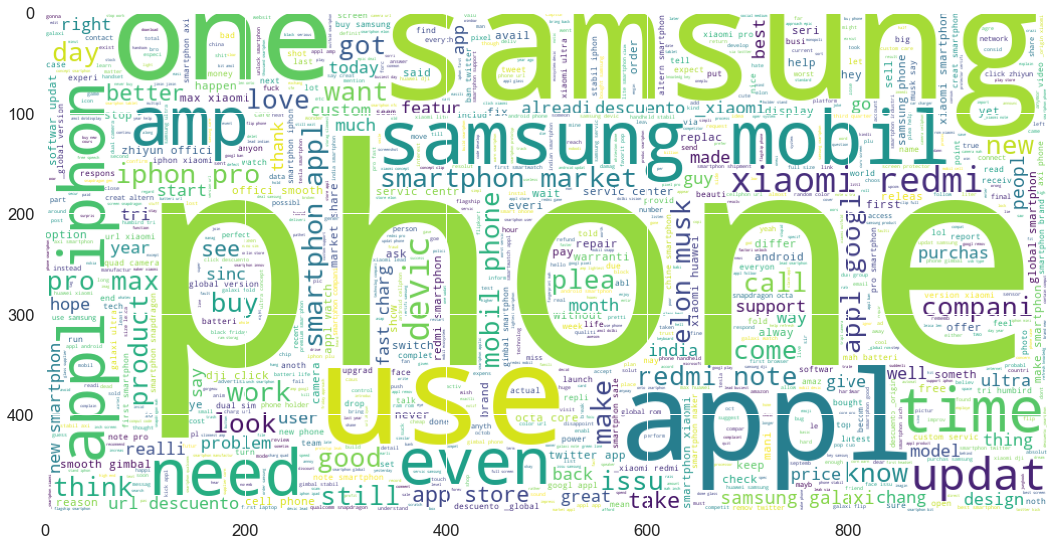

In [14]:
from PIL import Image
from wordcloud import WordCloud
from matplotlib import pyplot as plt #(matplotblib)
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator,wordcloud
from wordcloud import WordCloud, STOPWORDS
stopwords=set(STOPWORDS)
#data=data[0:200]
all_text= (' '.join(data['cleanText']))
len(all_text)
wordcloudneg = WordCloud(width = 1000, background_color = 'white',height = 500,stopwords=stopwords,max_words=12000,
                max_font_size=300,normalize_plurals = False, 
                repeat = False).generate(all_text)
plt.figure(figsize=(18,10))
plt.imshow(wordcloudneg)
plt.axis('on')

In [15]:
data.to_csv("smartphone_preprocessed_sentiments.csv")

In [39]:
data=pd.read_csv("smartphone_preprocessed_sentiments.csv")

In [40]:
#Date wise distribution of sentiments

In [15]:
from datetime import datetime
from datetime import timedelta
data['Date'] = pd.to_datetime(data['Date'], utc=True, errors='coerce', format='%Y-%m-%d %H:%M:%S')
data['Date'] = pd.IntervalIndex(pd.cut(data['Date'], pd.date_range('2022-10-01', '2022-11-30', freq='2880T'))).left
# count sentiment
tweet_count1 = data.groupby(['Date','Sentiment'])['cleanText'].count().reset_index().rename(columns={'cleanText':'count'})
#tweet_count1[:50]

In [16]:
#format sentiment table
times = tweet_count1.loc[tweet_count1['Sentiment'] == 'Negative']['Date'].reset_index(drop = True)
neg = tweet_count1.loc[tweet_count1['Sentiment'] == 'Negative']['count'].reset_index(drop = True)

plt.figure(figsize=(9,6))
plt.xticks(rotation='45')
plt.title("Date wise sentiment counts")

lin1=plt.plot(times, neg, 'r^-', label='Negative')
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

<function matplotlib.pyplot.show(close=None, block=None)>

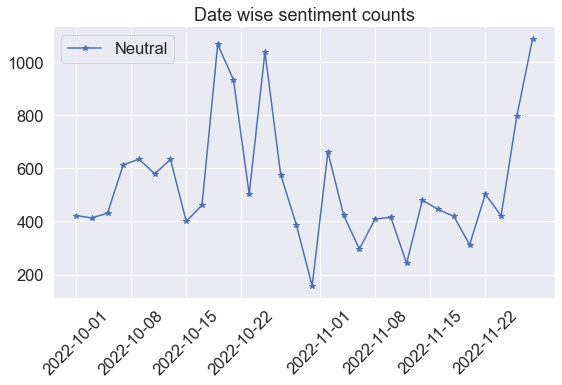

In [17]:
#format sentiment table
times = tweet_count1.loc[tweet_count1['Sentiment'] == 'Neutral']['Date'].reset_index(drop = True)
#pos = tweet_count1.loc[tweet_count1['Sentiment'] == 'Negative']['count'].reset_index(drop = True)
neutral = tweet_count1.loc[tweet_count1['Sentiment'] == 'Neutral']['count'].reset_index(drop = True)
#neg = tweet_count1.loc[tweet_count1['Sentiment'] == 'Neutral']['count'].reset_index(drop = True)

plt.figure(figsize=(9,5))
plt.xticks(rotation='45')
plt.title("Date wise sentiment counts")

lin1=plt.plot(times, neutral, 'b*-', label='Neutral')
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

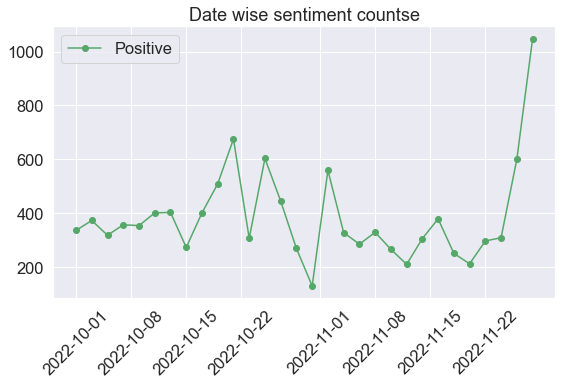

In [18]:
#format sentiment table
times = tweet_count1.loc[tweet_count1['Sentiment'] == 'Positive']['Date'].reset_index(drop = True)
pos = tweet_count1.loc[tweet_count1['Sentiment'] == 'Positive']['count'].reset_index(drop = True)
plt.figure(figsize=(9,5))
plt.xticks(rotation='45')
plt.title("Date wise sentiment countse")

lin1=plt.plot(times, pos, 'go-', label='Positive')
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

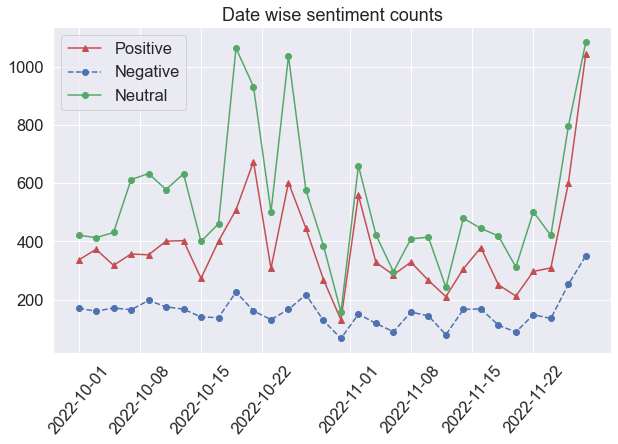

In [19]:
#format sentiment table
times = tweet_count1.loc[tweet_count1['Sentiment'] == 'Negative']['Date'].reset_index(drop = True)
pos = tweet_count1.loc[tweet_count1['Sentiment'] == 'Positive']['count'].reset_index(drop = True)
nega = tweet_count1.loc[tweet_count1['Sentiment'] == 'Negative']['count'].reset_index(drop = True)
neutral = tweet_count1.loc[tweet_count1['Sentiment'] == 'Neutral']['count'].reset_index(drop = True)

plt.figure(figsize=(10,6))
plt.xticks(rotation='50')
plt.title("Date wise sentiment counts")

lin1=plt.plot(times, pos, 'r^-', label='Positive')
lin2=plt.plot(times, nega, 'bo--', label='Negative')
lin3=plt.plot(times, neutral, 'go-', label='Neutral')
plt.legend()
plt.show

**Splitting and count vectorizer**

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train1, y_test1 = train_test_split(data['cleanText'].values.astype('U') , data["Sentiment"], test_size=0.20)
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X_train1 = vectorizer.fit_transform(X_train)
X_test1=vectorizer.transform(X_test)

In [21]:

##########2
start_time = time.time()
from sklearn.linear_model import LogisticRegression
print("LR")
a = LogisticRegression(random_state=150, solver='newton-cg',multi_class='multinomial',C=2.0)
a.fit(X_train1, y_train1)
# calculate accuracy of class predictions
y_pred_class = a.predict(X_test1)
print(classification_report(y_test1, y_pred_class))
print(confusion_matrix(y_test1, y_pred_class))
accuracy = accuracy_score(y_test1, y_pred_class)
print('Accuracy: %f' % accuracy)
precision = precision_score(y_test1, y_pred_class,average='weighted')
print('Precision: %f' % precision)
recall = recall_score(y_test1, y_pred_class, average='weighted')
print('Recall: %f' % recall)
f1 = f1_score(y_test1, y_pred_class, average='weighted')
print('F1 score: %f' % f1)
end_time = time.time()
print("Execution time: ", end_time - start_time,"secs")

#########3
start_time = time.time()
from sklearn.ensemble import ExtraTreesClassifier
print("ETC")
a =  ExtraTreesClassifier(n_estimators=100, random_state=150, max_depth=300)
a.fit(X_train1, y_train1)
# calculate accuracy of class predictions
y_pred_class = a.predict(X_test1)
print(classification_report(y_test1, y_pred_class))
print(confusion_matrix(y_test1, y_pred_class))
accuracy = accuracy_score(y_test1, y_pred_class)
print('Accuracy: %f' % accuracy)
precision = precision_score(y_test1, y_pred_class,average='weighted')
print('Precision: %f' % precision)
recall = recall_score(y_test1, y_pred_class, average='weighted')
print('Recall: %f' % recall)
f1 = f1_score(y_test1, y_pred_class, average='weighted')
print('F1 score: %f' % f1)
end_time = time.time()
print("Execution time: ", end_time - start_time,"secs")

#######4
import time    # this is an inbuilt library in Python
start_time = time.time()
from sklearn.ensemble import GradientBoostingClassifier
print("GBM")
clf = GradientBoostingClassifier(n_estimators=50, random_state=150, max_depth=200)
clf.fit(X_train1, y_train1)
# calculate accuracy of class predictions
y_pred_class = clf.predict(X_test1)
print(classification_report(y_test1, y_pred_class))
print(confusion_matrix(y_test1, y_pred_class))
accuracy = accuracy_score(y_test1, y_pred_class)
print('Accuracy: %f' % accuracy)
precision = precision_score(y_test1, y_pred_class,average='weighted')
print('Precision: %f' % precision)
recall = recall_score(y_test1, y_pred_class, average='weighted')
print('Recall: %f' % recall)
f1 = f1_score(y_test1, y_pred_class, average='weighted')
print('F1 score: %f' % f1)
end_time = time.time()
print("Execution time: ", end_time - start_time,"secs")

########5
import time    # this is an inbuilt library in Python
start_time = time.time()
from sklearn.neighbors import KNeighborsClassifier
print("KNN")
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train1, y_train1)
# calculate accuracy of class predictions
y_pred_class = clf.predict(X_test1)
print(classification_report(y_test1, y_pred_class))
print(confusion_matrix(y_test1, y_pred_class))
accuracy = accuracy_score(y_test1, y_pred_class)
print('Accuracy: %f' % accuracy)
precision = precision_score(y_test1, y_pred_class,average='weighted')
print('Precision: %f' % precision)
recall = recall_score(y_test1, y_pred_class, average='weighted')
print('Recall: %f' % recall)
f1 = f1_score(y_test1, y_pred_class, average='weighted')
print('F1 score: %f' % f1)
end_time = time.time()
print("Execution time: ", end_time - start_time,"secs")

#######6
start_time = time.time()
from sklearn.svm import SVC
print("SVC")
svm = SVC(kernel='linear', C=3.0, random_state=100)
svm.fit(X_train1, y_train1)
# calculate accuracy of class predictions
y_pred_class = svm.predict(X_test1)
print(classification_report(y_test1, y_pred_class))
print(confusion_matrix(y_test1, y_pred_class))
accuracy = accuracy_score(y_test1, y_pred_class)
print('Accuracy: %f' % accuracy)
precision = precision_score(y_test1, y_pred_class,average='weighted')
print('Precision: %f' % precision)
recall = recall_score(y_test1, y_pred_class, average='weighted')
print('Recall: %f' % recall)
f1 = f1_score(y_test1, y_pred_class, average='weighted')
print('F1 score: %f' % f1)
end_time = time.time()
print("Execution time: ", end_time - start_time,"secs")

########7
start_time = time.time()
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
print("ADA")
xgb = AdaBoostClassifier(n_estimators=100, random_state=50)
xgb.fit(X_train1, y_train1)
# calculate accuracy of class predictions
y_pred_class = xgb.predict(X_test1)
print(classification_report(y_test1, y_pred_class))
print(confusion_matrix(y_test1, y_pred_class))
accuracy = accuracy_score(y_test1, y_pred_class)
print('Accuracy: %f' % accuracy)
precision = precision_score(y_test1, y_pred_class,average='weighted')
print('Precision: %f' % precision)
recall = recall_score(y_test1, y_pred_class, average='weighted')
print('Recall: %f' % recall)
f1 = f1_score(y_test1, y_pred_class, average='weighted')
print('F1 score: %f' % f1)
end_time = time.time()
print("Execution time: ", end_time - start_time,"secs")

########8
start_time = time.time()
from sklearn.tree import DecisionTreeClassifier
etc = DecisionTreeClassifier(random_state=150, max_depth=300)
print("DT")
etc.fit(X_train1, y_train1)
# calculate accuracy of class predictions
y_pred_class = etc.predict(X_test1)
print(classification_report(y_test1, y_pred_class))
print(confusion_matrix(y_test1, y_pred_class))
accuracy = accuracy_score(y_test1, y_pred_class)
print('Accuracy: %f' % accuracy)
precision = precision_score(y_test1, y_pred_class,average='weighted')
print('Precision: %f' % precision)
recall = recall_score(y_test1, y_pred_class, average='weighted')
print('Recall: %f' % recall)
f1 = f1_score(y_test1, y_pred_class, average='weighted')
print('F1 score: %f' % f1)
end_time = time.time()
print("Execution time: ", end_time - start_time,"secs")


###9
start_time = time.time()
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss="hinge", penalty="l2", max_iter=5)
print("SGD")
sgd.fit(X_train1, y_train1)
# calculate accuracy of class predictions
y_pred_class = sgd.predict(X_test1)
print(classification_report(y_test1, y_pred_class))
print(confusion_matrix(y_test1, y_pred_class))
accuracy = accuracy_score(y_test1, y_pred_class)
print('Accuracy: %f' % accuracy)
precision = precision_score(y_test1, y_pred_class,average='weighted')
print('Precision: %f' % precision)
recall = recall_score(y_test1, y_pred_class, average='weighted')
print('Recall: %f' % recall)
f1 = f1_score(y_test1, y_pred_class, average='weighted')
print('F1 score: %f' % f1)
end_time = time.time()
print("Execution time: ", end_time - start_time,"secs")


#########1
start_time = time.time()
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
print("RF")
rfc = RandomForestClassifier(n_estimators=100, random_state=50, max_depth=150) 
rfc.fit(X_train1, y_train1)
# calculate accuracy of class predictions
y_pred_class = rfc.predict(X_test1)
print(classification_report(y_test1, y_pred_class))
print(confusion_matrix(y_test1, y_pred_class))
accuracy = accuracy_score(y_test1, y_pred_class)
print('Accuracy: %f' % accuracy)
precision = precision_score(y_test1, y_pred_class,average='weighted')
print('Precision: %f' % precision)
recall = recall_score(y_test1, y_pred_class, average='weighted')
print('Recall: %f' % recall)
f1 = f1_score(y_test1, y_pred_class, average='weighted')
print('F1 score: %f' % f1)
end_time = time.time()
print("Execution time: ", end_time - start_time,"secs")


LR
              precision    recall  f1-score   support

    Negative       0.96      0.90      0.93      1001
     Neutral       0.97      0.99      0.98      3170
    Positive       0.98      0.97      0.97      2313

    accuracy                           0.97      6484
   macro avg       0.97      0.96      0.96      6484
weighted avg       0.97      0.97      0.97      6484

[[ 904   55   42]
 [   7 3152   11]
 [  35   28 2250]]
Accuracy: 0.972548
Precision: 0.972393
Recall: 0.972548
F1 score: 0.972305
Execution time:  2.8976171016693115 secs
ETC
              precision    recall  f1-score   support

    Negative       0.95      0.79      0.86      1001
     Neutral       0.95      0.99      0.97      3170
    Positive       0.94      0.95      0.95      2313

    accuracy                           0.95      6484
   macro avg       0.95      0.91      0.93      6484
weighted avg       0.95      0.95      0.95      6484

[[ 794   93  114]
 [   2 3149   19]
 [  43   76 2194]]
Accur

C:\Users\CH MOON\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


              precision    recall  f1-score   support

    Negative       0.95      0.88      0.91      1001
     Neutral       0.97      0.99      0.98      3170
    Positive       0.97      0.97      0.97      2313

    accuracy                           0.97      6484
   macro avg       0.96      0.95      0.96      6484
weighted avg       0.97      0.97      0.97      6484

[[ 883   59   59]
 [   8 3150   12]
 [  39   35 2239]]
Accuracy: 0.967304
Precision: 0.967067
Recall: 0.967304
F1 score: 0.966930
Execution time:  0.3844614028930664 secs
RF
              precision    recall  f1-score   support

    Negative       0.95      0.66      0.78      1001
     Neutral       0.89      0.99      0.94      3170
    Positive       0.94      0.92      0.93      2313

    accuracy                           0.92      6484
   macro avg       0.93      0.86      0.88      6484
weighted avg       0.92      0.92      0.91      6484

[[ 664  218  119]
 [   3 3153   14]
 [  33  156 2124]]
Accuracy:

# Without preprocessing

In [22]:
data=pd.read_csv("smartphone.csv")
data=data.drop_duplicates(subset=['Tweets'], keep='first')
data.isnull().sum()
data=data.dropna(subset=['Tweets'],axis=0) 

import nltk
from textblob import  TextBlob
#Create a function to get the subjectivity
def getSubjectivity(twt):
  return TextBlob(twt).sentiment.subjectivity

#Create a function to get the polarity
def getPolarity(twt):
  return TextBlob(twt).sentiment.polarity


#Create two new columns to save the results of the created functions 
data['Subjectivity'] = data['Tweets'].apply(getSubjectivity)
data['Polarity'] = data['Tweets'].apply(getPolarity)

 #Creating a function to classify or label the sentiments as negative, positive and neutral
def getSentiment(value):
  if value < 0:
    return 'Negative'
  elif value > 0:
    return 'Positive'
  else:
    return 'Neutral'


# Create a new column 'Sentiment'
data['Sentiment'] = data['Polarity'].apply(getSentiment)

data.head()


temp = data.groupby('Sentiment').count()['Tweets'].reset_index().sort_values(by='Tweets',ascending=False)
temp.style.background_gradient(cmap='Reds')


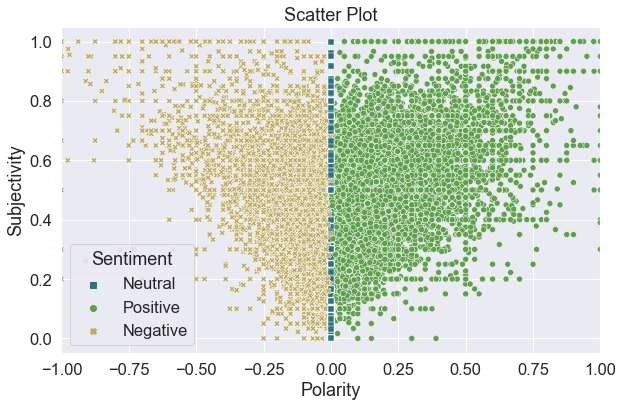

In [23]:
# Create scatter plot
sns.set_style('darkgrid')
sns.set(font_scale=1.5)
plt.figure(figsize = (9,6))

markers = {'Positive':'o', 'Neutral':'s','Negative':'X'}

sns.scatterplot(data=data, x='Polarity', y='Subjectivity', hue = 'Sentiment', style = 'Sentiment', markers = markers, palette = 'gist_earth').set(xlim=(-1,1))
plt.title('Scatter Plot')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')

plt.tight_layout()

In [27]:
data.to_csv("smartphone_withoutpreprocessed_sentiments.csv")

In [24]:
from datetime import datetime
from datetime import timedelta
data['Date'] = pd.to_datetime(data['Date'], utc=True, errors='coerce', format='%Y-%m-%d %H:%M:%S')
data['Date'] = pd.IntervalIndex(pd.cut(data['Date'], pd.date_range('2022-10-01', '2022-11-30', freq='2880T'))).left
# count sentiment
tweet_count1 = data.groupby(['Date','Sentiment'])['Tweets'].count().reset_index().rename(columns={'Tweets':'count'})
#tweet_count1[:50]


#format sentiment table
times = tweet_count1.loc[tweet_count1['Sentiment'] == 'Negative']['Date'].reset_index(drop = True)
pos = tweet_count1.loc[tweet_count1['Sentiment'] == 'Positive']['count'].reset_index(drop = True)
nega = tweet_count1.loc[tweet_count1['Sentiment'] == 'Negative']['count'].reset_index(drop = True)
neutral = tweet_count1.loc[tweet_count1['Sentiment'] == 'Neutral']['count'].reset_index(drop = True)

plt.figure(figsize=(10,6))
plt.xticks(rotation='50')
plt.title("Date wise sentiment counts")

lin1=plt.plot(times, pos, 'r^-', label='Positive')
lin2=plt.plot(times, nega, 'bo--', label='Negative')
lin3=plt.plot(times, neutral, 'go-', label='Neutral')
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train1, y_test1 = train_test_split(data['Tweets'].values.astype('U') , data["Sentiment"], test_size=0.20)
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X_train1 = vectorizer.fit_transform(X_train)
X_test1=vectorizer.transform(X_test)


##########2
start_time = time.time()
from sklearn.linear_model import LogisticRegression
print("LR")
a = LogisticRegression(random_state=150, solver='newton-cg',multi_class='multinomial',C=2.0)
a.fit(X_train1, y_train1)
# calculate accuracy of class predictions
y_pred_class = a.predict(X_test1)
print(classification_report(y_test1, y_pred_class))
print(confusion_matrix(y_test1, y_pred_class))
accuracy = accuracy_score(y_test1, y_pred_class)
print('Accuracy: %f' % accuracy)
precision = precision_score(y_test1, y_pred_class,average='weighted')
print('Precision: %f' % precision)
recall = recall_score(y_test1, y_pred_class, average='weighted')
print('Recall: %f' % recall)
f1 = f1_score(y_test1, y_pred_class, average='weighted')
print('F1 score: %f' % f1)
end_time = time.time()
print("Execution time: ", end_time - start_time,"secs")

#########3
start_time = time.time()
from sklearn.ensemble import ExtraTreesClassifier
print("ETC")
a =  ExtraTreesClassifier(n_estimators=100, random_state=150, max_depth=300)
a.fit(X_train1, y_train1)
# calculate accuracy of class predictions
y_pred_class = a.predict(X_test1)
print(classification_report(y_test1, y_pred_class))
print(confusion_matrix(y_test1, y_pred_class))
accuracy = accuracy_score(y_test1, y_pred_class)
print('Accuracy: %f' % accuracy)
precision = precision_score(y_test1, y_pred_class,average='weighted')
print('Precision: %f' % precision)
recall = recall_score(y_test1, y_pred_class, average='weighted')
print('Recall: %f' % recall)
f1 = f1_score(y_test1, y_pred_class, average='weighted')
print('F1 score: %f' % f1)
end_time = time.time()
print("Execution time: ", end_time - start_time,"secs")

#######4
import time    # this is an inbuilt library in Python
start_time = time.time()
from sklearn.ensemble import GradientBoostingClassifier
print("GBM")
clf = GradientBoostingClassifier(n_estimators=50, random_state=150, max_depth=200)
clf.fit(X_train1, y_train1)
# calculate accuracy of class predictions
y_pred_class = clf.predict(X_test1)
print(classification_report(y_test1, y_pred_class))
print(confusion_matrix(y_test1, y_pred_class))
accuracy = accuracy_score(y_test1, y_pred_class)
print('Accuracy: %f' % accuracy)
precision = precision_score(y_test1, y_pred_class,average='weighted')
print('Precision: %f' % precision)
recall = recall_score(y_test1, y_pred_class, average='weighted')
print('Recall: %f' % recall)
f1 = f1_score(y_test1, y_pred_class, average='weighted')
print('F1 score: %f' % f1)
end_time = time.time()
print("Execution time: ", end_time - start_time,"secs")

########5
import time    # this is an inbuilt library in Python
start_time = time.time()
from sklearn.neighbors import KNeighborsClassifier
print("KNN")
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train1, y_train1)
# calculate accuracy of class predictions
y_pred_class = clf.predict(X_test1)
print(classification_report(y_test1, y_pred_class))
print(confusion_matrix(y_test1, y_pred_class))
accuracy = accuracy_score(y_test1, y_pred_class)
print('Accuracy: %f' % accuracy)
precision = precision_score(y_test1, y_pred_class,average='weighted')
print('Precision: %f' % precision)
recall = recall_score(y_test1, y_pred_class, average='weighted')
print('Recall: %f' % recall)
f1 = f1_score(y_test1, y_pred_class, average='weighted')
print('F1 score: %f' % f1)
end_time = time.time()
print("Execution time: ", end_time - start_time,"secs")

#######6
start_time = time.time()
from sklearn.svm import SVC
print("SVC")
svm = SVC(kernel='linear', C=3.0, random_state=100)
svm.fit(X_train1, y_train1)
# calculate accuracy of class predictions
y_pred_class = svm.predict(X_test1)
print(classification_report(y_test1, y_pred_class))
print(confusion_matrix(y_test1, y_pred_class))
accuracy = accuracy_score(y_test1, y_pred_class)
print('Accuracy: %f' % accuracy)
precision = precision_score(y_test1, y_pred_class,average='weighted')
print('Precision: %f' % precision)
recall = recall_score(y_test1, y_pred_class, average='weighted')
print('Recall: %f' % recall)
f1 = f1_score(y_test1, y_pred_class, average='weighted')
print('F1 score: %f' % f1)
end_time = time.time()
print("Execution time: ", end_time - start_time,"secs")

########7
start_time = time.time()
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
print("ADA")
xgb = AdaBoostClassifier(n_estimators=100, random_state=50)
xgb.fit(X_train1, y_train1)
# calculate accuracy of class predictions
y_pred_class = xgb.predict(X_test1)
print(classification_report(y_test1, y_pred_class))
print(confusion_matrix(y_test1, y_pred_class))
accuracy = accuracy_score(y_test1, y_pred_class)
print('Accuracy: %f' % accuracy)
precision = precision_score(y_test1, y_pred_class,average='weighted')
print('Precision: %f' % precision)
recall = recall_score(y_test1, y_pred_class, average='weighted')
print('Recall: %f' % recall)
f1 = f1_score(y_test1, y_pred_class, average='weighted')
print('F1 score: %f' % f1)
end_time = time.time()
print("Execution time: ", end_time - start_time,"secs")

########8
start_time = time.time()
from sklearn.tree import DecisionTreeClassifier
etc = DecisionTreeClassifier(random_state=150, max_depth=300)
print("DT")
etc.fit(X_train1, y_train1)
# calculate accuracy of class predictions
y_pred_class = etc.predict(X_test1)
print(classification_report(y_test1, y_pred_class))
print(confusion_matrix(y_test1, y_pred_class))
accuracy = accuracy_score(y_test1, y_pred_class)
print('Accuracy: %f' % accuracy)
precision = precision_score(y_test1, y_pred_class,average='weighted')
print('Precision: %f' % precision)
recall = recall_score(y_test1, y_pred_class, average='weighted')
print('Recall: %f' % recall)
f1 = f1_score(y_test1, y_pred_class, average='weighted')
print('F1 score: %f' % f1)
end_time = time.time()
print("Execution time: ", end_time - start_time,"secs")


###9
start_time = time.time()
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss="hinge", penalty="l2", max_iter=5)
print("SGD")
sgd.fit(X_train1, y_train1)
# calculate accuracy of class predictions
y_pred_class = sgd.predict(X_test1)
print(classification_report(y_test1, y_pred_class))
print(confusion_matrix(y_test1, y_pred_class))
accuracy = accuracy_score(y_test1, y_pred_class)
print('Accuracy: %f' % accuracy)
precision = precision_score(y_test1, y_pred_class,average='weighted')
print('Precision: %f' % precision)
recall = recall_score(y_test1, y_pred_class, average='weighted')
print('Recall: %f' % recall)
f1 = f1_score(y_test1, y_pred_class, average='weighted')
print('F1 score: %f' % f1)
end_time = time.time()
print("Execution time: ", end_time - start_time,"secs")


#########1
start_time = time.time()
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
print("RF")
rfc = RandomForestClassifier(n_estimators=100, random_state=50, max_depth=150) 
rfc.fit(X_train1, y_train1)
# calculate accuracy of class predictions
y_pred_class = rfc.predict(X_test1)
print(classification_report(y_test1, y_pred_class))
print(confusion_matrix(y_test1, y_pred_class))
accuracy = accuracy_score(y_test1, y_pred_class)
print('Accuracy: %f' % accuracy)
precision = precision_score(y_test1, y_pred_class,average='weighted')
print('Precision: %f' % precision)
recall = recall_score(y_test1, y_pred_class, average='weighted')
print('Recall: %f' % recall)
f1 = f1_score(y_test1, y_pred_class, average='weighted')
print('F1 score: %f' % f1)
end_time = time.time()
print("Execution time: ", end_time - start_time,"secs")


LR
              precision    recall  f1-score   support

    Negative       0.83      0.76      0.79      1084
     Neutral       0.90      0.95      0.92      2366
    Positive       0.93      0.91      0.92      3034

    accuracy                           0.90      6484
   macro avg       0.88      0.87      0.88      6484
weighted avg       0.90      0.90      0.90      6484

[[ 822  127  135]
 [  35 2251   80]
 [ 135  133 2766]]
Accuracy: 0.900524
Precision: 0.899819
Recall: 0.900524
F1 score: 0.899580
Execution time:  11.146838426589966 secs
ETC
              precision    recall  f1-score   support

    Negative       0.90      0.44      0.59      1084
     Neutral       0.84      0.88      0.86      2366
    Positive       0.81      0.92      0.86      3034

    accuracy                           0.83      6484
   macro avg       0.85      0.75      0.77      6484
weighted avg       0.84      0.83      0.82      6484

[[ 478  210  396]
 [  18 2091  257]
 [  36  194 2804]]
Accur

C:\Users\CH MOON\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


              precision    recall  f1-score   support

    Negative       0.79      0.76      0.77      1084
     Neutral       0.87      0.94      0.91      2366
    Positive       0.93      0.88      0.91      3034

    accuracy                           0.89      6484
   macro avg       0.86      0.86      0.86      6484
weighted avg       0.89      0.89      0.88      6484

[[ 823  137  124]
 [  60 2233   73]
 [ 161  190 2683]]
Accuracy: 0.885102
Precision: 0.885993
Recall: 0.885102
F1 score: 0.884700
Execution time:  0.3905322551727295 secs
RF
              precision    recall  f1-score   support

    Negative       0.87      0.31      0.46      1084
     Neutral       0.77      0.87      0.82      2366
    Positive       0.79      0.89      0.83      3034

    accuracy                           0.79      6484
   macro avg       0.81      0.69      0.70      6484
weighted avg       0.79      0.79      0.77      6484

[[ 336  307  441]
 [  18 2068  280]
 [  34  314 2686]]
Accuracy:

# crypto dataset

In [26]:
data=pd.read_csv("crypto_10k_tweets.csv", lineterminator='\n')
data.head(2)
# Creating a function to clean the tweets

def cleantwt (twt):
  emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)

  twt = re.sub('RT', '', twt) # remove 'RT' from tweets
  twt = re.sub('#[A-Za-z0-9]+', '', twt) # remove the '#' from the tweets
  twt = re.sub('\\n', '', twt) # remove the '\n' character
  twt = re.sub('https?:\/\/\S+', '', twt) # remove the hyperlinks
  twt = re.sub('@[\S]*', '', twt) # remove @mentions
  twt = re.sub('^[\s]+|[\s]+$', '', twt) # remove leading and trailing whitespaces
  twt = re.sub(emoj, '', twt) # remove emojis
  return twt


# Create a new column with the cleaned tweets

data['c_Tweets'] = data['Content'].apply(cleantwt)

##
#Preprocessing of text tweets to remove : Punction, Numbers, stropwords hash tages , links stemming, lematization


import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import stopwords
import re
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer() 

def preprocess(sentence):
    sentence=str(sentence)
    sentence = sentence.lower()
    sentence=sentence.replace('{html}',"") 
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', sentence)
    rem_url=re.sub(r'http\S+', '',cleantext)
    rem_num = re.sub('[0-9]+', '', rem_url)
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(rem_num)  
    filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english') and "amp"]
    stem_words=[stemmer.stem(w) for w in filtered_words]
    lemma_words=[lemmatizer.lemmatize(w) for w in stem_words]
    return " ".join(lemma_words)
data['cleanText']=data['c_Tweets'].map(lambda s:preprocess(s))

In [27]:

import nltk
from textblob import  TextBlob
#Create a function to get the subjectivity
def getSubjectivity(twt):
  return TextBlob(twt).sentiment.subjectivity

#Create a function to get the polarity
def getPolarity(twt):
  return TextBlob(twt).sentiment.polarity


#Create two new columns to save the results of the created functions 
data['Subjectivity'] = data['cleanText'].apply(getSubjectivity)
data['Polarity'] = data['cleanText'].apply(getPolarity)

 #Creating a function to classify or label the sentiments as negative, positive and neutral
def getSentiment(value):
  if value < 0:
    return 'Negative'
  elif value > 0:
    return 'Positive'
  else:
    return 'Neutral'


# Create a new column 'Sentiment'
data['Sentiment'] = data['Polarity'].apply(getSentiment)

data.head()


temp = data.groupby('Sentiment').count()['cleanText'].reset_index().sort_values(by='cleanText',ascending=False)
temp.style.background_gradient(cmap='Reds')


In [32]:
data.to_csv("crypto_10k_tweets_preprocessed_sentiments.csv")

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train1, y_test1 = train_test_split(data['cleanText'].values.astype('U') , data["Sentiment"], test_size=0.20)
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X_train1 = vectorizer.fit_transform(X_train)
X_test1=vectorizer.transform(X_test)




##########2
start_time = time.time()
from sklearn.linear_model import LogisticRegression
print("LR")
a = LogisticRegression(random_state=150, solver='newton-cg',multi_class='multinomial',C=2.0)
a.fit(X_train1, y_train1)
# calculate accuracy of class predictions
y_pred_class = a.predict(X_test1)
print(classification_report(y_test1, y_pred_class))
print(confusion_matrix(y_test1, y_pred_class))
accuracy = accuracy_score(y_test1, y_pred_class)
print('Accuracy: %f' % accuracy)
precision = precision_score(y_test1, y_pred_class,average='weighted')
print('Precision: %f' % precision)
recall = recall_score(y_test1, y_pred_class, average='weighted')
print('Recall: %f' % recall)
f1 = f1_score(y_test1, y_pred_class, average='weighted')
print('F1 score: %f' % f1)
end_time = time.time()
print("Execution time: ", end_time - start_time,"secs")

#########3
start_time = time.time()
from sklearn.ensemble import ExtraTreesClassifier
print("ETC")
a =  ExtraTreesClassifier(n_estimators=100, random_state=150, max_depth=300)
a.fit(X_train1, y_train1)
# calculate accuracy of class predictions
y_pred_class = a.predict(X_test1)
print(classification_report(y_test1, y_pred_class))
print(confusion_matrix(y_test1, y_pred_class))
accuracy = accuracy_score(y_test1, y_pred_class)
print('Accuracy: %f' % accuracy)
precision = precision_score(y_test1, y_pred_class,average='weighted')
print('Precision: %f' % precision)
recall = recall_score(y_test1, y_pred_class, average='weighted')
print('Recall: %f' % recall)
f1 = f1_score(y_test1, y_pred_class, average='weighted')
print('F1 score: %f' % f1)
end_time = time.time()
print("Execution time: ", end_time - start_time,"secs")

#######4
import time    # this is an inbuilt library in Python
start_time = time.time()
from sklearn.ensemble import GradientBoostingClassifier
print("GBM")
clf = GradientBoostingClassifier(n_estimators=50, random_state=150, max_depth=200)
clf.fit(X_train1, y_train1)
# calculate accuracy of class predictions
y_pred_class = clf.predict(X_test1)
print(classification_report(y_test1, y_pred_class))
print(confusion_matrix(y_test1, y_pred_class))
accuracy = accuracy_score(y_test1, y_pred_class)
print('Accuracy: %f' % accuracy)
precision = precision_score(y_test1, y_pred_class,average='weighted')
print('Precision: %f' % precision)
recall = recall_score(y_test1, y_pred_class, average='weighted')
print('Recall: %f' % recall)
f1 = f1_score(y_test1, y_pred_class, average='weighted')
print('F1 score: %f' % f1)
end_time = time.time()
print("Execution time: ", end_time - start_time,"secs")

########5
import time    # this is an inbuilt library in Python
start_time = time.time()
from sklearn.neighbors import KNeighborsClassifier
print("KNN")
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train1, y_train1)
# calculate accuracy of class predictions
y_pred_class = clf.predict(X_test1)
print(classification_report(y_test1, y_pred_class))
print(confusion_matrix(y_test1, y_pred_class))
accuracy = accuracy_score(y_test1, y_pred_class)
print('Accuracy: %f' % accuracy)
precision = precision_score(y_test1, y_pred_class,average='weighted')
print('Precision: %f' % precision)
recall = recall_score(y_test1, y_pred_class, average='weighted')
print('Recall: %f' % recall)
f1 = f1_score(y_test1, y_pred_class, average='weighted')
print('F1 score: %f' % f1)
end_time = time.time()
print("Execution time: ", end_time - start_time,"secs")

#######6
start_time = time.time()
from sklearn.svm import SVC
print("SVC")
svm = SVC(kernel='linear', C=3.0, random_state=100)
svm.fit(X_train1, y_train1)
# calculate accuracy of class predictions
y_pred_class = svm.predict(X_test1)
print(classification_report(y_test1, y_pred_class))
print(confusion_matrix(y_test1, y_pred_class))
accuracy = accuracy_score(y_test1, y_pred_class)
print('Accuracy: %f' % accuracy)
precision = precision_score(y_test1, y_pred_class,average='weighted')
print('Precision: %f' % precision)
recall = recall_score(y_test1, y_pred_class, average='weighted')
print('Recall: %f' % recall)
f1 = f1_score(y_test1, y_pred_class, average='weighted')
print('F1 score: %f' % f1)
end_time = time.time()
print("Execution time: ", end_time - start_time,"secs")

########7
start_time = time.time()
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
print("ADA")
xgb = AdaBoostClassifier(n_estimators=100, random_state=50)
xgb.fit(X_train1, y_train1)
# calculate accuracy of class predictions
y_pred_class = xgb.predict(X_test1)
print(classification_report(y_test1, y_pred_class))
print(confusion_matrix(y_test1, y_pred_class))
accuracy = accuracy_score(y_test1, y_pred_class)
print('Accuracy: %f' % accuracy)
precision = precision_score(y_test1, y_pred_class,average='weighted')
print('Precision: %f' % precision)
recall = recall_score(y_test1, y_pred_class, average='weighted')
print('Recall: %f' % recall)
f1 = f1_score(y_test1, y_pred_class, average='weighted')
print('F1 score: %f' % f1)
end_time = time.time()
print("Execution time: ", end_time - start_time,"secs")

########8
start_time = time.time()
from sklearn.tree import DecisionTreeClassifier
etc = DecisionTreeClassifier(random_state=150, max_depth=300)
print("DT")
etc.fit(X_train1, y_train1)
# calculate accuracy of class predictions
y_pred_class = etc.predict(X_test1)
print(classification_report(y_test1, y_pred_class))
print(confusion_matrix(y_test1, y_pred_class))
accuracy = accuracy_score(y_test1, y_pred_class)
print('Accuracy: %f' % accuracy)
precision = precision_score(y_test1, y_pred_class,average='weighted')
print('Precision: %f' % precision)
recall = recall_score(y_test1, y_pred_class, average='weighted')
print('Recall: %f' % recall)
f1 = f1_score(y_test1, y_pred_class, average='weighted')
print('F1 score: %f' % f1)
end_time = time.time()
print("Execution time: ", end_time - start_time,"secs")


###9
start_time = time.time()
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss="hinge", penalty="l2", max_iter=5)
print("SGD")
sgd.fit(X_train1, y_train1)
# calculate accuracy of class predictions
y_pred_class = sgd.predict(X_test1)
print(classification_report(y_test1, y_pred_class))
print(confusion_matrix(y_test1, y_pred_class))
accuracy = accuracy_score(y_test1, y_pred_class)
print('Accuracy: %f' % accuracy)
precision = precision_score(y_test1, y_pred_class,average='weighted')
print('Precision: %f' % precision)
recall = recall_score(y_test1, y_pred_class, average='weighted')
print('Recall: %f' % recall)
f1 = f1_score(y_test1, y_pred_class, average='weighted')
print('F1 score: %f' % f1)
end_time = time.time()
print("Execution time: ", end_time - start_time,"secs")


#########1
start_time = time.time()
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
print("RF")
rfc = RandomForestClassifier(n_estimators=100, random_state=50, max_depth=150) 
rfc.fit(X_train1, y_train1)
# calculate accuracy of class predictions
y_pred_class = rfc.predict(X_test1)
print(classification_report(y_test1, y_pred_class))
print(confusion_matrix(y_test1, y_pred_class))
accuracy = accuracy_score(y_test1, y_pred_class)
print('Accuracy: %f' % accuracy)
precision = precision_score(y_test1, y_pred_class,average='weighted')
print('Precision: %f' % precision)
recall = recall_score(y_test1, y_pred_class, average='weighted')
print('Recall: %f' % recall)
f1 = f1_score(y_test1, y_pred_class, average='weighted')
print('F1 score: %f' % f1)
end_time = time.time()
print("Execution time: ", end_time - start_time,"secs")


LR
              precision    recall  f1-score   support

    Negative       0.92      0.71      0.80       167
     Neutral       0.94      0.99      0.96      1365
    Positive       0.96      0.87      0.91       468

    accuracy                           0.94      2000
   macro avg       0.94      0.86      0.89      2000
weighted avg       0.94      0.94      0.94      2000

[[ 119   37   11]
 [   3 1355    7]
 [   7   56  405]]
Accuracy: 0.939500
Precision: 0.939735
Recall: 0.939500
F1 score: 0.937376
Execution time:  0.6404788494110107 secs
ETC
              precision    recall  f1-score   support

    Negative       0.96      0.71      0.82       167
     Neutral       0.95      1.00      0.97      1365
    Positive       0.96      0.90      0.93       468

    accuracy                           0.95      2000
   macro avg       0.95      0.87      0.90      2000
weighted avg       0.95      0.95      0.95      2000

[[ 119   35   13]
 [   1 1359    5]
 [   4   44  420]]
Accur

C:\Users\CH MOON\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


              precision    recall  f1-score   support

    Negative       0.97      0.56      0.71       167
     Neutral       0.90      1.00      0.95      1365
    Positive       0.95      0.81      0.88       468

    accuracy                           0.92      2000
   macro avg       0.94      0.79      0.85      2000
weighted avg       0.92      0.92      0.91      2000

[[  94   58   15]
 [   1 1361    3]
 [   2   87  379]]
Accuracy: 0.917000
Precision: 0.921096
Recall: 0.917000
F1 score: 0.911596
Execution time:  22.919758081436157 secs


In [29]:
data=pd.read_csv("crypto_10k_tweets.csv", lineterminator='\n') 
import nltk
from textblob import  TextBlob
#Create a function to get the subjectivity
def getSubjectivity(twt):
  return TextBlob(twt).sentiment.subjectivity

#Create a function to get the polarity
def getPolarity(twt):
  return TextBlob(twt).sentiment.polarity


#Create two new columns to save the results of the created functions 
data['Subjectivity'] = data['Content'].apply(getSubjectivity)
data['Polarity'] = data['Content'].apply(getPolarity)

 #Creating a function to classify or label the sentiments as negative, positive and neutral
def getSentiment(value):
  if value < 0:
    return 'Negative'
  elif value > 0:
    return 'Positive'
  else:
    return 'Neutral'


# Create a new column 'Sentiment'
data['Sentiment'] = data['Polarity'].apply(getSentiment)

data.head()


temp = data.groupby('Sentiment').count()['Content'].reset_index().sort_values(by='Content',ascending=False)
temp.style.background_gradient(cmap='Reds')


In [35]:
data.to_csv("crypto_10k_tweets_withoutpreprocessed_sentiments.csv")

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train1, y_test1 = train_test_split(data['Content'].values.astype('U') , data["Sentiment"], test_size=0.20)
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X_train1 = vectorizer.fit_transform(X_train)
X_test1=vectorizer.transform(X_test)


##########2
start_time = time.time()
from sklearn.linear_model import LogisticRegression
print("LR")
a = LogisticRegression(random_state=150, solver='newton-cg',multi_class='multinomial',C=2.0)
a.fit(X_train1, y_train1)
# calculate accuracy of class predictions
y_pred_class = a.predict(X_test1)
print(classification_report(y_test1, y_pred_class))
print(confusion_matrix(y_test1, y_pred_class))
accuracy = accuracy_score(y_test1, y_pred_class)
print('Accuracy: %f' % accuracy)
precision = precision_score(y_test1, y_pred_class,average='weighted')
print('Precision: %f' % precision)
recall = recall_score(y_test1, y_pred_class, average='weighted')
print('Recall: %f' % recall)
f1 = f1_score(y_test1, y_pred_class, average='weighted')
print('F1 score: %f' % f1)
end_time = time.time()
print("Execution time: ", end_time - start_time,"secs")

#########3
start_time = time.time()
from sklearn.ensemble import ExtraTreesClassifier
print("ETC")
a =  ExtraTreesClassifier(n_estimators=100, random_state=150, max_depth=300)
a.fit(X_train1, y_train1)
# calculate accuracy of class predictions
y_pred_class = a.predict(X_test1)
print(classification_report(y_test1, y_pred_class))
print(confusion_matrix(y_test1, y_pred_class))
accuracy = accuracy_score(y_test1, y_pred_class)
print('Accuracy: %f' % accuracy)
precision = precision_score(y_test1, y_pred_class,average='weighted')
print('Precision: %f' % precision)
recall = recall_score(y_test1, y_pred_class, average='weighted')
print('Recall: %f' % recall)
f1 = f1_score(y_test1, y_pred_class, average='weighted')
print('F1 score: %f' % f1)
end_time = time.time()
print("Execution time: ", end_time - start_time,"secs")

#######4
import time    # this is an inbuilt library in Python
start_time = time.time()
from sklearn.ensemble import GradientBoostingClassifier
print("GBM")
clf = GradientBoostingClassifier(n_estimators=50, random_state=150, max_depth=200)
clf.fit(X_train1, y_train1)
# calculate accuracy of class predictions
y_pred_class = clf.predict(X_test1)
print(classification_report(y_test1, y_pred_class))
print(confusion_matrix(y_test1, y_pred_class))
accuracy = accuracy_score(y_test1, y_pred_class)
print('Accuracy: %f' % accuracy)
precision = precision_score(y_test1, y_pred_class,average='weighted')
print('Precision: %f' % precision)
recall = recall_score(y_test1, y_pred_class, average='weighted')
print('Recall: %f' % recall)
f1 = f1_score(y_test1, y_pred_class, average='weighted')
print('F1 score: %f' % f1)
end_time = time.time()
print("Execution time: ", end_time - start_time,"secs")

########5
import time    # this is an inbuilt library in Python
start_time = time.time()
from sklearn.neighbors import KNeighborsClassifier
print("KNN")
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train1, y_train1)
# calculate accuracy of class predictions
y_pred_class = clf.predict(X_test1)
print(classification_report(y_test1, y_pred_class))
print(confusion_matrix(y_test1, y_pred_class))
accuracy = accuracy_score(y_test1, y_pred_class)
print('Accuracy: %f' % accuracy)
precision = precision_score(y_test1, y_pred_class,average='weighted')
print('Precision: %f' % precision)
recall = recall_score(y_test1, y_pred_class, average='weighted')
print('Recall: %f' % recall)
f1 = f1_score(y_test1, y_pred_class, average='weighted')
print('F1 score: %f' % f1)
end_time = time.time()
print("Execution time: ", end_time - start_time,"secs")

#######6
start_time = time.time()
from sklearn.svm import SVC
print("SVC")
svm = SVC(kernel='linear', C=3.0, random_state=100)
svm.fit(X_train1, y_train1)
# calculate accuracy of class predictions
y_pred_class = svm.predict(X_test1)
print(classification_report(y_test1, y_pred_class))
print(confusion_matrix(y_test1, y_pred_class))
accuracy = accuracy_score(y_test1, y_pred_class)
print('Accuracy: %f' % accuracy)
precision = precision_score(y_test1, y_pred_class,average='weighted')
print('Precision: %f' % precision)
recall = recall_score(y_test1, y_pred_class, average='weighted')
print('Recall: %f' % recall)
f1 = f1_score(y_test1, y_pred_class, average='weighted')
print('F1 score: %f' % f1)
end_time = time.time()
print("Execution time: ", end_time - start_time,"secs")

########7
start_time = time.time()
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
print("ADA")
xgb = AdaBoostClassifier(n_estimators=100, random_state=50)
xgb.fit(X_train1, y_train1)
# calculate accuracy of class predictions
y_pred_class = xgb.predict(X_test1)
print(classification_report(y_test1, y_pred_class))
print(confusion_matrix(y_test1, y_pred_class))
accuracy = accuracy_score(y_test1, y_pred_class)
print('Accuracy: %f' % accuracy)
precision = precision_score(y_test1, y_pred_class,average='weighted')
print('Precision: %f' % precision)
recall = recall_score(y_test1, y_pred_class, average='weighted')
print('Recall: %f' % recall)
f1 = f1_score(y_test1, y_pred_class, average='weighted')
print('F1 score: %f' % f1)
end_time = time.time()
print("Execution time: ", end_time - start_time,"secs")

########8
start_time = time.time()
from sklearn.tree import DecisionTreeClassifier
etc = DecisionTreeClassifier(random_state=150, max_depth=300)
print("DT")
etc.fit(X_train1, y_train1)
# calculate accuracy of class predictions
y_pred_class = etc.predict(X_test1)
print(classification_report(y_test1, y_pred_class))
print(confusion_matrix(y_test1, y_pred_class))
accuracy = accuracy_score(y_test1, y_pred_class)
print('Accuracy: %f' % accuracy)
precision = precision_score(y_test1, y_pred_class,average='weighted')
print('Precision: %f' % precision)
recall = recall_score(y_test1, y_pred_class, average='weighted')
print('Recall: %f' % recall)
f1 = f1_score(y_test1, y_pred_class, average='weighted')
print('F1 score: %f' % f1)
end_time = time.time()
print("Execution time: ", end_time - start_time,"secs")


###9
start_time = time.time()
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss="hinge", penalty="l2", max_iter=5)
print("SGD")
sgd.fit(X_train1, y_train1)
# calculate accuracy of class predictions
y_pred_class = sgd.predict(X_test1)
print(classification_report(y_test1, y_pred_class))
print(confusion_matrix(y_test1, y_pred_class))
accuracy = accuracy_score(y_test1, y_pred_class)
print('Accuracy: %f' % accuracy)
precision = precision_score(y_test1, y_pred_class,average='weighted')
print('Precision: %f' % precision)
recall = recall_score(y_test1, y_pred_class, average='weighted')
print('Recall: %f' % recall)
f1 = f1_score(y_test1, y_pred_class, average='weighted')
print('F1 score: %f' % f1)
end_time = time.time()
print("Execution time: ", end_time - start_time,"secs")


#########1
start_time = time.time()
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
print("RF")
rfc = RandomForestClassifier(n_estimators=100, random_state=50, max_depth=150) 
rfc.fit(X_train1, y_train1)
# calculate accuracy of class predictions
y_pred_class = rfc.predict(X_test1)
print(classification_report(y_test1, y_pred_class))
print(confusion_matrix(y_test1, y_pred_class))
accuracy = accuracy_score(y_test1, y_pred_class)
print('Accuracy: %f' % accuracy)
precision = precision_score(y_test1, y_pred_class,average='weighted')
print('Precision: %f' % precision)
recall = recall_score(y_test1, y_pred_class, average='weighted')
print('Recall: %f' % recall)
f1 = f1_score(y_test1, y_pred_class, average='weighted')
print('F1 score: %f' % f1)
end_time = time.time()
print("Execution time: ", end_time - start_time,"secs")


LR
              precision    recall  f1-score   support

    Negative       0.75      0.57      0.65       169
     Neutral       0.90      0.97      0.93      1217
    Positive       0.90      0.82      0.86       614

    accuracy                           0.89      2000
   macro avg       0.85      0.79      0.81      2000
weighted avg       0.89      0.89      0.89      2000

[[  96   41   32]
 [  12 1180   25]
 [  20   89  505]]
Accuracy: 0.890500
Precision: 0.887352
Recall: 0.890500
F1 score: 0.886578
Execution time:  1.6133456230163574 secs
ETC
              precision    recall  f1-score   support

    Negative       0.91      0.34      0.50       169
     Neutral       0.90      0.97      0.93      1217
    Positive       0.84      0.85      0.84       614

    accuracy                           0.88      2000
   macro avg       0.88      0.72      0.76      2000
weighted avg       0.88      0.88      0.87      2000

[[  58   47   64]
 [   4 1177   36]
 [   2   91  521]]
Accur

C:\Users\CH MOON\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


              precision    recall  f1-score   support

    Negative       0.92      0.32      0.47       169
     Neutral       0.85      0.97      0.91      1217
    Positive       0.85      0.77      0.81       614

    accuracy                           0.86      2000
   macro avg       0.87      0.69      0.73      2000
weighted avg       0.86      0.86      0.84      2000

[[  54   66   49]
 [   2 1183   32]
 [   3  137  474]]
Accuracy: 0.855500
Precision: 0.858910
Recall: 0.855500
F1 score: 0.842085
Execution time:  48.67012333869934 secs
